# Project: Investigate a Dataset - [TMDb_movie_data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb).
1. id - ID for each movie.
2. imdb_id - ID for each movie on IMDB.
3. popularity - The movie popularity in numbers.
4. budget - The total budget of the movie.
5. revenue - The revenue gained by the movie.
6. original_title - The original title of the movie the wat it released.
7. cast - The cast names.
8. homepage - The movie homepage link.
9. director - The director name.
10. tagline - The advertising slogan of the movie.
11. keywords - The tags related to the movie.
12. overview - A brief overview of the movie.
13. runtime - The movie time in minutes.
14. genre - The movie type or category.
15. production_companies - The name of the company produced the movie.
16. release_date - The date on which the movie was released.
17. vote_count - The total number of votes the movie recieved.
18. vote_average - The average ratings the movie recieved.
19. release_year - The year in which the movie was released.
20. budget_adj - The budget associated to the movie in terms of 2010 dollars.
21. revenue_adj - The revenue associated to the movie in terms of 2010 dollars.

Total:
10866 Rows
21 Columns


### Question(s) for Analysis
1. How popularity affects profits? And is the popularity affected by the runtime?
2. How does the budget change over time?

> We will import the important packages for our analysis:
- **pandas** is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.
- **NumPy** is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
- **Seaborn** is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- **Matplotlib** is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.

In [1]:
#   See this page for more about 'magic word':
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline
sns.set()

In [ ]:
# Causes problem with some functions like head()

# Upgrade pandas to use dataframe.explode() function. 

#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling


### General Properties

Here, we will load the dataset and explore it!

In [2]:
# Load TMDB data and print out the 1st 5 rows

movie_df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
movie_df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
# how many rows and columns are there in the dataset

movie_df.shape

(10866, 21)

In [4]:
# what are the columns or features in the dataset?

movie_df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
# What are the types of columns or features in the dataset?

movie_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
# explore the non-null values

movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> There are some issues to takle:

1. the dataset has a lot of **missing values**, we need to deal with them.

2. **release_date** needs to be converted into DateTime type.

3. columns like \[**'id', 'imdb_id', 'homepage', 'tagline', 'overview', 'budget_adj', 'revenue_adj'**\] are not necessary and we can drop them. 

In [7]:
# print some statistics about the numerical columns 

movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


I noticed that **budget, revenue, and runtime** have minimum value of zero and that is not correct.

In [8]:
# check how many unique values in each column

movie_df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [9]:
# check if there are any duplicated rows in the dataset!

movie_df.duplicated().sum()

1

Well, there is only one **duplicated** row. We can just drop it.


### Data Cleaning 

> **Here, we will implement the following:**
    
1. delete the **duplicated** rows.

2. the dataset has a lot of **missing values**, we need to deal with them.

3. **release_date** needs to be converted into DateTime type.

4. drop the **unnecessary** columns.

5. delete zero values in **budget, revenue, and runtime** columns.

#### 1. delete the duplicated rows.

In [10]:
# print out the sum of duplicated rows

movie_df.duplicated().sum()

1

In [11]:
# show duplicates

movie_df[movie_df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [12]:
# delete duplicates 

movie_df.drop_duplicates(inplace=True)

In [13]:
# check if the deletion succeeded

movie_df.duplicated().sum()

0

#### 2. the dataset has a lot of missing values, we need to deal with them.

In [14]:
# print out the sum of null values in each column

movie_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

*director, keywords, genres, and production_companies* columns have null values!

I think it is better to drop the null values.

In [15]:
movie_df.dropna(how = 'any',inplace = True)

In [16]:
# check if all null values are deleted

movie_df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

#### 3. release_date needs to be converted into DateTime type.

In [17]:
# change column type

movie_df['release_date'] = pd.to_datetime(movie_df['release_date'])

# check column type
movie_df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

#### 4. drop the unnecessary columns.

In [18]:
# drop columns

movie_df.drop(['id', 'imdb_id', 'homepage', 'tagline', 
               'overview', 'budget_adj', 'revenue_adj'], 
              axis = 1, inplace = True)

In [19]:
# check if columns have been deleted

movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 14 columns):
popularity              1992 non-null float64
budget                  1992 non-null int64
revenue                 1992 non-null int64
original_title          1992 non-null object
cast                    1992 non-null object
director                1992 non-null object
keywords                1992 non-null object
runtime                 1992 non-null int64
genres                  1992 non-null object
production_companies    1992 non-null object
release_date            1992 non-null datetime64[ns]
vote_count              1992 non-null int64
vote_average            1992 non-null float64
release_year            1992 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(6)
memory usage: 233.4+ KB


#### 5. delete zero values in budget, revenue, and runtime columns.

First, I want to check how many zero values in each column?

In [20]:
budget_0 = movie_df.loc[(movie_df[['budget']] == 0).all(axis=1)]
print(budget_0.shape)
budget_0.head(1)

(546, 14)


,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
30,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,london|detective|sherlock holmes,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,2015-06-19,425,6.4,2015


In [21]:
revenue_0 = movie_df.loc[(movie_df[['revenue']] == 0).all(axis=1)]
print(revenue_0.shape)
revenue_0.head(1)

(546, 14)


,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
67,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,new year's eve|fire|showdown|terrorist|embassy,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,2015-05-21,280,5.4,2015


In [22]:
runtime_0 = movie_df.loc[(movie_df[['runtime']] == 0).all(axis=1)]
print(runtime_0.shape)
runtime_0.head(1)

(2, 14)


,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
334,0.357654,0,0,Ronaldo,Cristiano Ronaldo,Anthony Wonke,biography|soccer player,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",2015-11-09,80,6.5,2015


Now, we create a function to delete the rows containing zero values under these three columns. 

In [23]:
def del_zero_vals(col):
    movie_df.drop(movie_df[movie_df[col] == 0].index, inplace = True)

zero_cols = ['budget', 'revenue', 'runtime']
for col in zero_cols:
    del_zero_vals(col)

In [24]:
# we expect changed min values

movie_df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,1287.000000,1.287000e+03,1.287000e+03,1287.000000,1287.000000,1287.000000,1287.000000
mean,1.786022,5.200349e+07,1.762444e+08,110.273504,947.266511,6.279487,2007.017094
std,2.172137,5.514540e+07,2.538156e+08,18.811369,1255.476215,0.795955,8.060503
min,0.010335,1.000000e+00,4.300000e+01,63.000000,10.000000,2.200000,1961.000000
25%,0.664783,1.400000e+07,2.565097e+07,97.000000,179.000000,5.800000,2005.000000
50%,1.152354,3.200000e+07,8.208716e+07,107.000000,439.000000,6.300000,2009.000000
75%,2.125342,7.000000e+07,2.140694e+08,121.000000,1173.000000,6.800000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,201.000000,9767.000000,8.300000,2015.000000


> _**Final shape of the dataset**_

In [25]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 10760
Data columns (total 14 columns):
popularity              1287 non-null float64
budget                  1287 non-null int64
revenue                 1287 non-null int64
original_title          1287 non-null object
cast                    1287 non-null object
director                1287 non-null object
keywords                1287 non-null object
runtime                 1287 non-null int64
genres                  1287 non-null object
production_companies    1287 non-null object
release_date            1287 non-null datetime64[ns]
vote_count              1287 non-null int64
vote_average            1287 non-null float64
release_year            1287 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(6)
memory usage: 150.8+ KB


In [26]:
movie_df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,1287.000000,1.287000e+03,1.287000e+03,1287.000000,1287.000000,1287.000000,1287.000000
mean,1.786022,5.200349e+07,1.762444e+08,110.273504,947.266511,6.279487,2007.017094
std,2.172137,5.514540e+07,2.538156e+08,18.811369,1255.476215,0.795955,8.060503
min,0.010335,1.000000e+00,4.300000e+01,63.000000,10.000000,2.200000,1961.000000
25%,0.664783,1.400000e+07,2.565097e+07,97.000000,179.000000,5.800000,2005.000000
50%,1.152354,3.200000e+07,8.208716e+07,107.000000,439.000000,6.300000,2009.000000
75%,2.125342,7.000000e+07,2.140694e+08,121.000000,1173.000000,6.800000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,201.000000,9767.000000,8.300000,2015.000000


In [27]:
movie_df.shape

(1287, 14)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (How popularity affects profits? And is the popularity affected by the runtime?)

_**Since we are going to explore whether there is a correlation between popularity and profits, as well as between popularity and the runtime; we are going to use a scatter plot.**_

In [28]:
# first, calculate profit column by subtracting budget from revenue 
# profit = revenue - budget

movie_df['profit'] = movie_df['revenue'] - movie_df['budget']

# check if column profit is created!
movie_df.head(1)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810


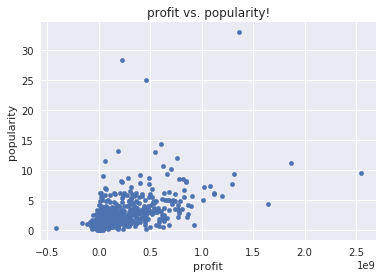

In [33]:
movie_df.plot(x='profit',y='popularity',kind='scatter')
plt.title('profit vs. popularity!')
plt.xlabel('profit')
plt.ylabel('popularity');

> We can see that the profit increases as the popularity increases. 

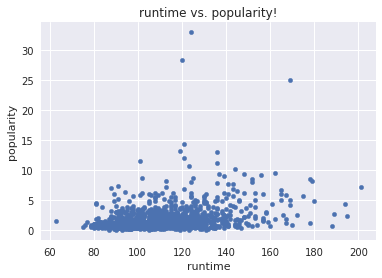

In [34]:
movie_df.plot(x='runtime',y='popularity',kind='scatter')
plt.title('runtime vs. popularity!')
plt.xlabel('runtime')
plt.ylabel('popularity');

> We can see that there is no obvious relationship between the popularity and runtime. 

### Research Question 2  (How does the budget change over time?)

_**Since we want to observe the budget changes over the years; we are going to use line plot.**_

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


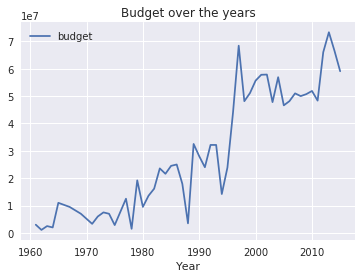

In [37]:
# in one year, we have many budget values; so we will take the mean budget in each year

mean_budget = movie_df.groupby(['release_year']).mean().budget

print(type(mean_budget))

# convert panda series into pandas dataframe

mean_budget = pd.DataFrame({'Year': mean_budget.index, 'budget': mean_budget.values})

print(type(mean_budget))

mean_budget.plot(x='Year', y = 'budget', title = 'Budget over the years', kind='line');

> We can see that the budget has been increasing over the years. 

_**Now, we want to observe the highest budget values in the last 25 years; we are going to use bar plot.**_

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


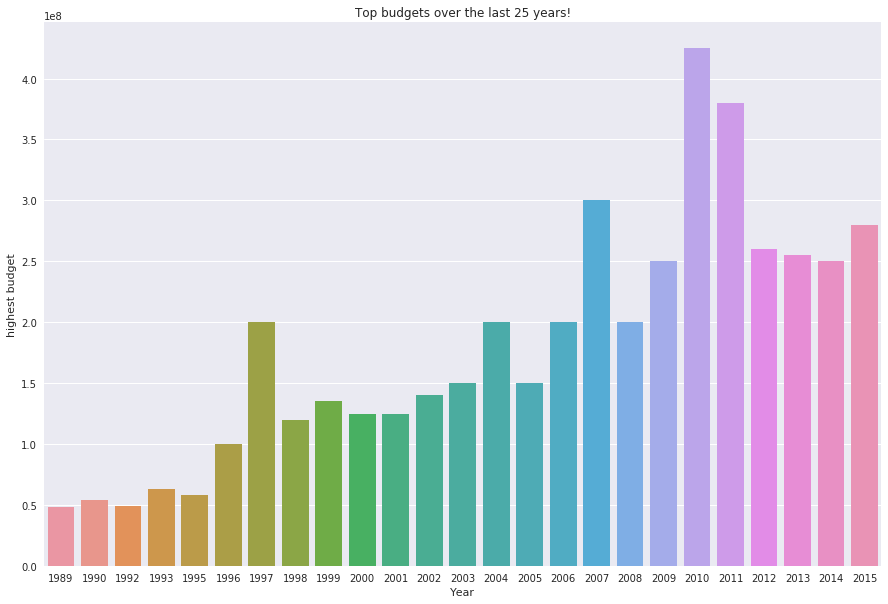

In [46]:
highest_budget = movie_df.groupby(['release_year']).max().budget.nlargest(25)

print(type(highest_budget))

# convert panda series into pandas dataframe

highest_budget = pd.DataFrame({'release_year': highest_budget.index, 'highest_budget': highest_budget.values})

print(type(highest_budget))

highest_budget = highest_budget.sort_values(by='highest_budget', ascending=False)

fig, axis = plt.subplots(figsize = (15, 10))
sns.barplot(x = 'release_year', y = 'highest_budget', data = highest_budget)
axis.set_title('Top budgets over the last 25 years!');
axis.set_xlabel('Year');
axis.set_ylabel('highest budget');

> We can see that the general trend of the budget increases over the years.

<a id='conclusions'></a>
## Conclusions
**Findings:**

_**Research Question 1**_ (How popularity affects profits? And is the popularity affected by the runtime?)

We saw that the profit increases as the popularity increases. 
Also, there is no obvious relationship between the popularity and runtime.

_**Research Question 2**_ (How does the budget change over time?)

We saw that the general trend of the budget has been increasing over the years.

**Limitations:**
- There were too many rows with null values and we couldn't fill them so we had to drop them causing a lot of data to be lost.

- Unnecessary columns we had to drop.

- Zero values in budget, revenue and uptime, which we had to drop.

## Submitting your Project 

In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0